In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SpaceshipTitanic/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SpaceshipTitanic/test.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


We need to check what is present in the dataset (Features of the Dataset)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Numerical Features in the dataset

In [ ]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


As we can see, the numerical features are about the total money spent on each of those amenities provided

In [ ]:
luxury_provided = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

train_df['total_billings'] = train_df[luxury_provided].sum(axis = 1)
test_df['total_billings'] = test_df[luxury_provided].sum(axis = 1)

train_df['total_billings'].describe()

count     8693.000000
mean      1440.866329
std       2803.045694
min          0.000000
25%          0.000000
50%        716.000000
75%       1441.000000
max      35987.000000
Name: total_billings, dtype: float64

The mean is low compared to the max, therefore we can say that a lot of people did not spend any money on the amenities

Grouping the passengers based on PassengerId

In [ ]:
pass_groups = train_df['PassengerId'].str.split('_', expand = True)[0]
groups_map = pd.value_counts(pass_groups)
train_df['group'] = pass_groups
train_df['num_ppl_in_group'] = pass_groups.map(groups_map)
groups_map

4498    8
8168    8
8728    8
8796    8
8956    8
       ..
3483    1
3480    1
3478    1
3473    1
4620    1
Name: 0, Length: 6217, dtype: int64

In [ ]:
pass_groups = test_df['PassengerId'].str.split('_', expand = True)[0]
groups_map = pd.value_counts(pass_groups)
test_df['group'] = pass_groups
test_df['num_ppl_in_group'] = pass_groups.map(groups_map)

In [ ]:
train_df['num_ppl_in_group'].describe()

count    8693.000000
mean        2.035546
std         1.596347
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         8.000000
Name: num_ppl_in_group, dtype: float64

Looking at the categorical features

In [ ]:
pd.value_counts(train_df['Cabin'])

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

Based on the Cabin Type, let us split it into three groups for deck, num and side

In [ ]:
train_df[['Cabin_deck','Cabin_num_ppl', 'Cabin_side']] = train_df['Cabin'].str.split('/', expand=True)
train_df['Cabin_side'] = train_df['Cabin_side'].map({'P':'Port', 'S':'Starboard'})
train_df['Cabin_num_ppl'] = train_df['Cabin_num_ppl'].astype(float)

In [ ]:
test_df[['Cabin_deck','Cabin_num', 'Cabin_side']] = test_df['Cabin'].str.split('/', expand=True)
test_df['Cabin_side'] = test_df['Cabin_side'].map({'P':'Port', 'S':'Starboard'})

In [ ]:
pd.value_counts(train_df['Cabin_deck'])

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Cabin_deck, dtype: int64

We can see that the highest number of people are in deck F and deck G

In [ ]:
train_df['Cabin_num_ppl'].describe()

count    8494.000000
mean      600.367671
std       511.867226
min         0.000000
25%       167.250000
50%       427.000000
75%       999.000000
max      1894.000000
Name: Cabin_num_ppl, dtype: float64

In [ ]:
pd.value_counts(train_df['Cabin_side'])

Starboard    4288
Port         4206
Name: Cabin_side, dtype: int64

These two sides have eqaul distribution

In [ ]:
pd.value_counts(train_df['HomePlanet'])

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

Most of the people are from Earth

In [ ]:
pd.value_counts(train_df['CryoSleep'])

False    5439
True     3037
Name: CryoSleep, dtype: int64

Most of the people do not choose to sleep

In [ ]:
pd.value_counts(train_df['Destination'])

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

The Destination Trappist-1e is famous for most of the people 

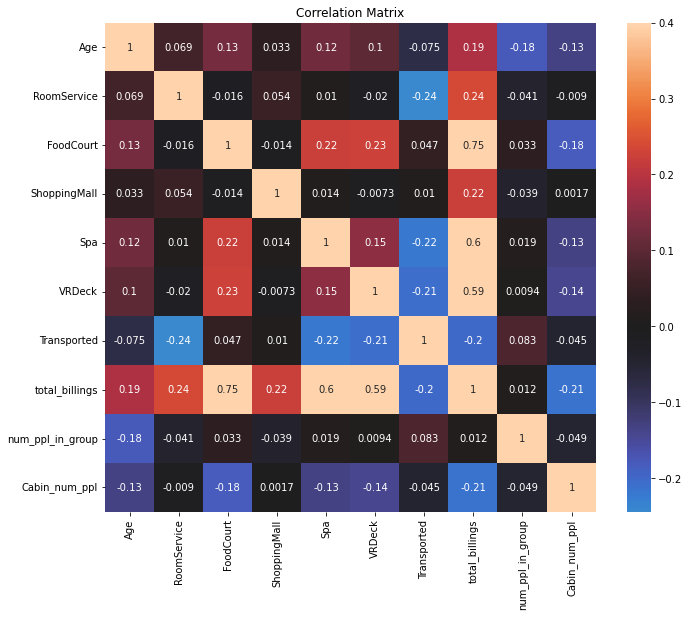

In [ ]:
corr = train_df.corr()
plt.subplots(figsize=(11, 9))
sns.heatmap(corr ,annot = True, vmax=.4, center=0).set_title('Correlation Matrix');

The best correlation for Transported is FoodCourt

There is no connection between cabin_num and Transported

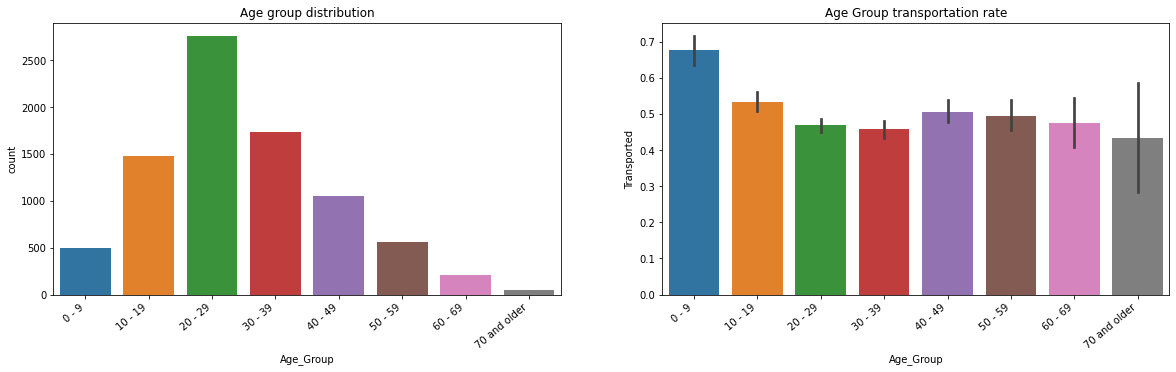

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

age_groups_thresholds = [0, 9, 19, 29, 39, 49, 59, 69, np.inf]
age_groups = ["0 - 9", "10 - 19", "20 - 29", "30 - 39", "40 - 49", "50 - 59", "60 - 69", "70 and older"]

# Define the x-axis using the age_group thresholds
train_df["Age_Group"] = pd.cut(train_df['Age'], age_groups_thresholds, labels=age_groups)

sns.countplot(ax = axes[0], x=train_df["Age_Group"]).set_title('Age group distribution')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 40, ha="right")

sns.barplot(ax = axes[1], data = train_df, x = "Age_Group", y = "Transported").set_title('Age Group transportation rate')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation = 40, ha="right");

From the above graph, we can see that most of the people on the spaceship were between 20-29 years of age

Transportation rate of the lowest class of age is the highest

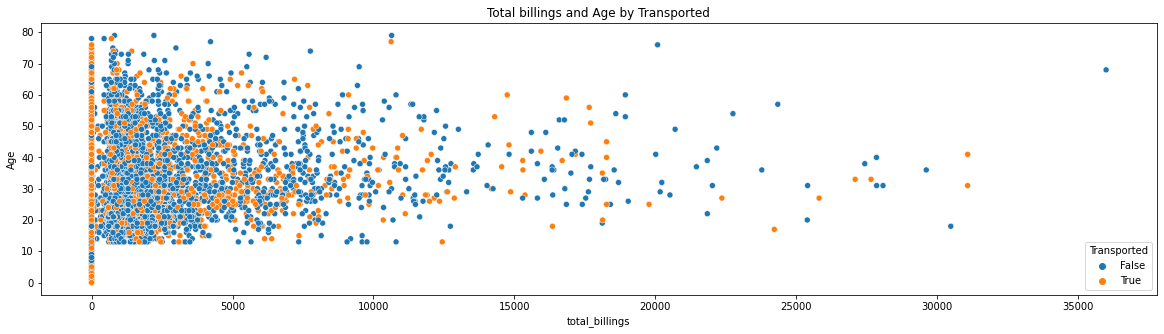

In [ ]:
plt.subplots(figsize=(20, 5))
sns.scatterplot(data = train_df, x='total_billings', y='Age', hue = 'Transported').set_title('Total billings and Age by Transported');

Most people are not using any services 

Therefore, No clear connection to Transported can be seen

Text(0.5, 1.0, 'Cabin deck transportation rate')

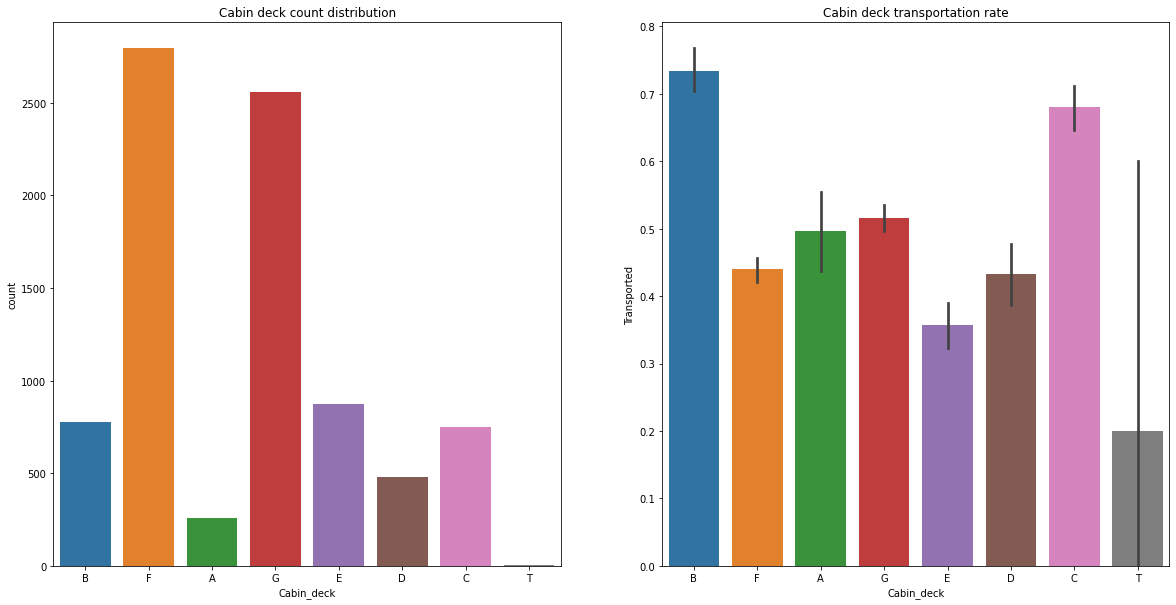

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(ax = axes[0], x = train_df['Cabin_deck']).set_title('Cabin deck count distribution')
sns.barplot(ax = axes[1], data = train_df, x = "Cabin_deck", y = "Transported").set_title('Cabin deck transportation rate')

Decks F and G were the most used

Cabin B and C had the highest chance of transportation

Preprocessing Starts here

In [ ]:
test_df_passengerId = test_df['PassengerId']

train_df = train_df.drop(['total_billings', 'Age_Group', 'Cabin_num_ppl', 'PassengerId', 'Cabin', 'Name'], axis = 1)
test_df = test_df.drop(['total_billings', 'Cabin_num', 'PassengerId', 'Cabin', 'Name'], axis = 1)

Removing NA values

In [ ]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace = True)
train_df['FoodCourt'].fillna(train_df['FoodCourt'].mean(), inplace = True)
train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].mean(), inplace = True)
train_df['Spa'].fillna(train_df['Spa'].mean(), inplace = True)
train_df['VRDeck'].fillna(train_df['VRDeck'].mean(), inplace = True)
train_df['RoomService'].fillna(train_df['RoomService'].mean(), inplace = True)

In [ ]:
test_df['Age'].fillna(test_df['Age'].mean(), inplace = True)
test_df['FoodCourt'].fillna(test_df['FoodCourt'].mean(), inplace = True)
test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].mean(), inplace = True)
test_df['Spa'].fillna(test_df['Spa'].mean(), inplace = True)
test_df['VRDeck'].fillna(test_df['VRDeck'].mean(), inplace = True)
test_df['RoomService'].fillna(test_df['RoomService'].mean(), inplace = True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

One Hot Encoding is used to convert numerical categorical variables into binary vectors

In [ ]:
s = (train_df.dtypes == 'object')
object_cols = list(s[s].index)

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_df[object_cols].astype('str')))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(test_df[object_cols].astype('str')))

OH_cols_train.index = train_df.index
OH_cols_valid.index = test_df.index

num_X_train = train_df.drop(object_cols, axis=1)
num_X_valid = test_df.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
train_df = pd.concat([num_X_train, OH_cols_train], axis=1)
test_df = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [ ]:
train_df = train_df.astype('float')
test_df = test_df.astype('float')

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Columns: 6250 entries, Age to 6242
dtypes: float64(6250)
memory usage: 203.9 MB


In [ ]:
train_df.shape

(8693, 6251)

In [ ]:
test_df.shape

(4277, 6250)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = train_df.drop('Transported', axis=1).to_numpy()
y = train_df['Transported'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0);

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver='newton-cg' ,max_iter=400)

In [ ]:
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.7918343875790684


In [ ]:
X_test = test_df.to_numpy()

In [ ]:
y_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Prediction distribution')

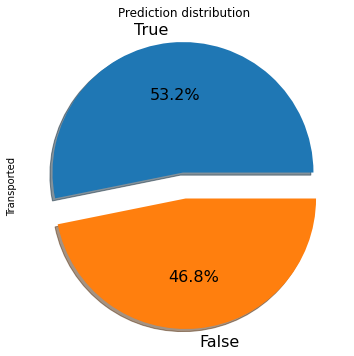

In [ ]:
# Sample submission (to get right format)
sub=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SpaceshipTitanic/sample_submission.csv')

# Add predictions
sub['Transported']= y_pred

# Replace 0 to False and 1 to True
sub=sub.replace({0:False, 1:True})

# Prediction distribution
plt.figure(figsize=(6,6))
sub['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction distribution")

In [ ]:
sub.to_csv("/content/drive/MyDrive/Colab Notebooks/SpaceshipTitanic/submission_file.csv", index=False)